# 基本流程图

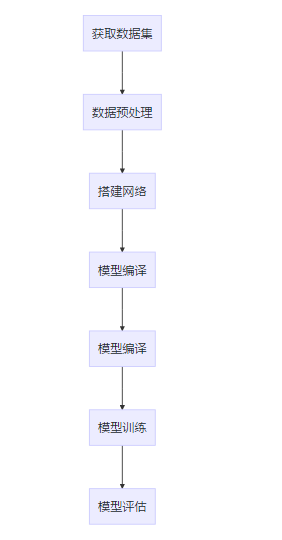

# 小试牛刀

首先我们运行一下以下的一段小程序

In [12]:
import tensorflow as tf  #引入TensorFlow包

mnist = tf.keras.datasets.mnist #引入mnist数据集，如果本地已经存在mnist数据集

(x_train, y_train),(x_test, y_test) = mnist.load_data() #x_train，y_train，x_test,y_test分别为训练集样本，测试集样本，训练集标签，测试集标签
x_train, x_test = x_train / 255.0, x_test / 255.0   #像素点取值范围为0~255，此处作为归一化处理，将样本从整数转换为浮点数

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   #把输入尺寸为28*28的图像拉直成一个向量
    tf.keras.layers.Dense(128, activation='relu'),   #全连接层，128个神经元，激活函数为relu
    tf.keras.layers.Dropout(0.2),                    #dropout层，随机废置百分之20的输入单元
    tf.keras.layers.Dense(10, activation='softmax')  #全连接层，10个神经元，激活函数为softmax
])


model.compile(optimizer='adam',   #优化器用 adam
              loss='sparse_categorical_crossentropy',  #loss函数为交叉熵
              metrics=['accuracy'])                    #评估指标用精确率

model.fit(x_train, y_train, epochs=5)      #模型训练开始啦，跑5个代数

model.evaluate(x_test, y_test, verbose=2)              #用测试集数据和测试集标签评估模型

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2985 - accuracy: 0.9124
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1483 - accuracy: 0.9555
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1091 - accuracy: 0.9666
Epoch 4/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0878 - accuracy: 0.9731
Epoch 5/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0772 - accuracy: 0.9755
10000/1 - 0s - loss: 0.0392 - accuracy: 0.9765


[0.07698469748918432, 0.9765]

# 预测
恭喜你，已经完成第一个神经网络的训练了，接下来我们看看训练好的模型的预测能力怎么样，我们挑选了测试集中前20张图片可视化，看看模型预测的是否正确？

* "[  ]"内为图片标签值

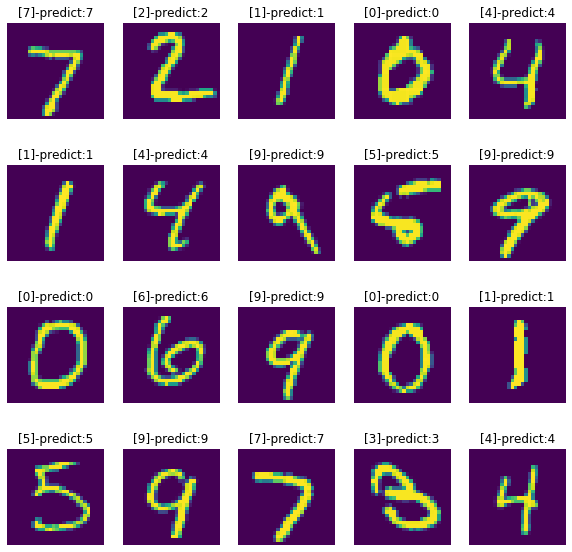

In [2]:
import matplotlib.pyplot as plt   #画图包
'''图片内嵌'''
%matplotlib inline  

prediction = model.predict_classes(x_test[0:20])    #model.predict_classes（）是自带的一个模型预测接口
plt.subplots(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.title('[{}]-predict:{}'.format(y_test[i],prediction[i]))
    plt.axis('off')
    plt.imshow(x_test[i])

# 深度网络搭建

我们看到了模型预测的效果还是不错的，但是我们搭建的网络只有两层全连接层，我们要学习的是深度神经网络，那肯定的是够深才行，下面教大家搭建VGG16的神经网络模型。

我们首先要介绍一下TensorFlow2.0中的网络搭建的几个常用API：

* tf.keras.models.Sequential
* tf.keras.layers.Conv2D
* tf.keras.layersMaxPooling2D
* tf.keras.Dense

###### tf.keras.models.Sequential
用于搭建模型前声明的一个类，最后是作为一个模型的整体。
###### tf.keras.layers.Conv2D
卷积层的API，主要用来建立卷积层，常用的参数有filters，kernel_size,activation,padding。

filters:该层卷积层中包含多少个卷积核；

kernel_size:卷积核的大小；

activation:该层卷积层后使用的激活函数；

padding:图片边缘填充。
###### tf.keras.layers.MaxPooling2D
池化层的API，主要用来建立池化层，常用的参数有pool_size，strides。

pool_size:池化核的大小

strides:池化核步长
###### tf.keras.layers.Dense
全连接层的API，主要用来建立去全连接层，常用的参数有unit，activation。

unit：该层全连接层有多少个神经元；

activation：该层全连接层后使用的激活函数。

我们先写来写一个带有卷积层的神经网络：

In [3]:
import tensorflow as tf
model2 = tf.keras.models.Sequential([
    #Block 1
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=(3, 3),
                           activation='relu',
                           padding='same',
                           name='block1_conv1'),
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=(3, 3),
                           activation='relu',
                           padding='same',
                           name='block1_conv2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block1_pool'),
    #Block 2
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(3,3),
                           activation='relu',
                           padding='same',
                           name='block2_conv1'),
    tf.keras.layers.Conv2D(filters=128,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same',
                          name='block2_conv2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block2_pool'),
    tf.keras.layers.Flatten(name='Flatten'),
    tf.keras.layers.Dense(10,activation='softmax',name='predictions')
])

写完网络，我们把上门入门级小程序网络部分替换掉。

In [13]:
(x_train1, y_train1),(x_test1, y_test1) = mnist.load_data() 

x_train1 = x_train1.reshape(-1,28,28,1)   #因为卷积层的输入需要四个维度呢，数据集原来只有三个维度，在这里添加一个维度。
x_test1 = x_test1.reshape(-1,28,28,1)

x_train1, x_test1 = (x_train1 / 255.0), (x_test1 / 255.0)   

model = model2     #替换的就是这里

model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])                    

model.fit(x_train1, y_train1, epochs=1)      #由于时间的关系只跑了一个epoch，有兴趣的同学可以多跑几个
model.evaluate(x_test1, y_test1, verbose=2)              

Train on 60000 samples
60000/60000 [==============================] - 322s 5ms/sample - loss: 0.0377 - accuracy: 0.9887 - loss: 0.0376 - ac
10000/1 - 15s - loss: 0.0185 - accuracy: 0.9910


[0.026327235705964267, 0.991]

有没有发现卷积层的优势？对比一下它们同样epoch得到的accuracy和loss吧！

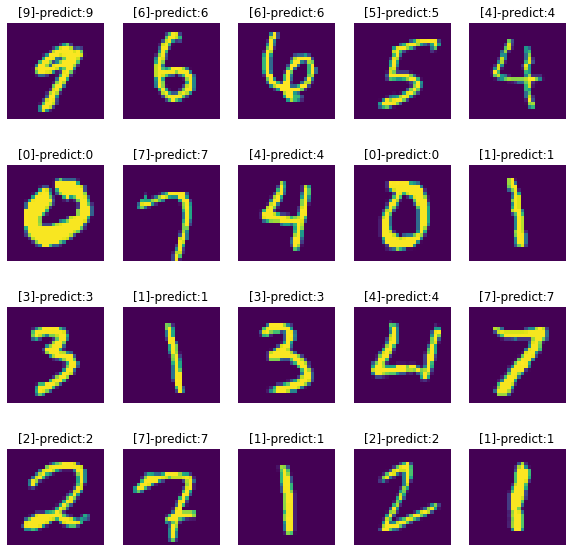

In [16]:
import matplotlib.pyplot as plt   #画图包
'''图片内嵌'''
%matplotlib inline  

prediction = model.predict_classes(x_test[20:40].reshape(-1,28,28,1))    #model.predict_classes（）是自带的一个模型预测接口
plt.subplots(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.title('[{}]-predict:{}'.format(y_test[i+20],prediction[i]))
    plt.axis('off')
    plt.imshow(x_test[i+20])

接下来我们看看真正的VGG16网络是怎么样写的：

In [6]:
vgg16 = tf.keras.models.Sequential([
    #输入层
    tf.keras.layers.Input(shape=(224,224,3)),
    #Block 1
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=(3, 3),
                           activation='relu',
                           padding='same',
                           name='block1_conv1'),
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=(3, 3),
                           activation='relu',
                           padding='same',
                           name='block1_conv2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block1_pool'),
    #Block 2
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(3,3),
                           activation='relu',
                           padding='same',
                           name='block2_conv1'),
    tf.keras.layers.Conv2D(filters=128,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same',
                          name='block2_conv2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block2_pool'),
    #Block 3 
    tf.keras.layers.Conv2D(filters=256,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same',
                          name='block3_conv1'),
    tf.keras.layers.Conv2D(filters=256,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same',
                          name='block3_conv2'),
    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=(3,3),
                           activation='relu',
                           padding='same',
                           name='block3_conv3'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block3_pool'),
    #Block 4
    tf.keras.layers.Conv2D(filters=512,
                           kernel_size=(3,3),
                           activation='relu',
                           padding='same',
                           name='block4_conv1'),
    tf.keras.layers.Conv2D(filters=512,
                           kernel_size=(3,3),
                           activation='relu',
                           padding='same',
                           name='block4_conv2'),
    tf.keras.layers.Conv2D(filters=512,
                           kernel_size=(3,3),
                           activation='relu',
                           padding='same',
                           name='block4_conv3'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block4_pool'),
    #Block 5
    tf.keras.layers.Conv2D(filters=512,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same',
                          name='block5_conv1'),
    tf.keras.layers.Conv2D(filters=512,
                          kernel_size=(3,3),
                          activation='relu',
                          padding='same',
                          name='block5_conv2'),
    tf.keras.layers.Conv2D(filters=512,
                           kernel_size=(3,3),
                           activation='relu',
                           padding='same',
                           name='block5_conv3'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block5_pool'),
    #Block 6
    tf.keras.layers.Flatten(input_shape=(),name='Flatten'),
    tf.keras.layers.Dense(4096,activation='relu',name='fc1'),
    tf.keras.layers.Dense(4096,activation='relu',name='fc2'),
    tf.keras.layers.Dense(10,activation='softmax',name='predictions')
],name='vgg16')

我们可以用vgg16.summary()来查看我们的网络结构！

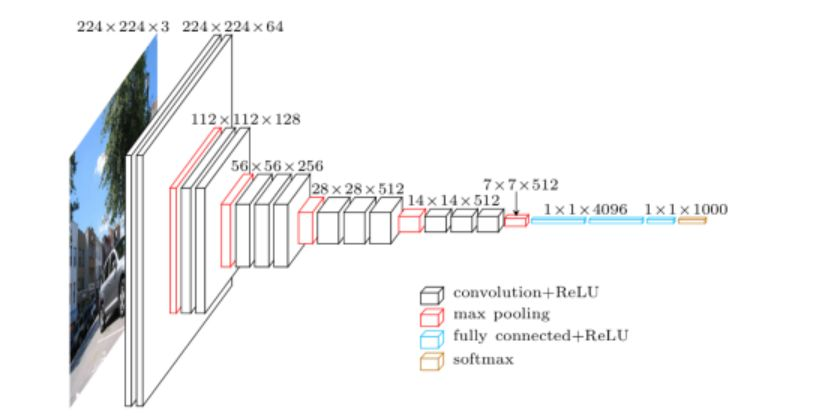

In [7]:
'''然后我们看看自己写的网络是不是跟论文的网络是一个样'''

vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168